In [312]:
import numpy as np
from matplotlib import pyplot as plt

In [313]:
def readDense(filename):
    lines = open(filename,"r").readlines()
    for i,line in enumerate(lines):
        if line[0] != "%":
            break
    m,n = lines[i].split(' ')
    m,n = int(m),int(n)
    tab = np.zeros((n,m), dtype = np.uint32)
    for j in range(m*n):
        tab[j//m, j%m] = int(lines[j+i+1])
    return tab

In [314]:
prime = 65537

In [369]:
def loadSPM(filename):
    lines = open(filename,"r").readlines()
    for i,line in enumerate(lines):
        if line[0] != "%":
            break
    m,n,nnz = lines[i].split(' ')
    m,n,nnz = int(m),int(n),int(nnz)
    tab = np.zeros((m,n), dtype = np.uint32)
    for j in range(nnz):
        x,y,v = lines[j+i+1].split(' ')
        
        x,y,v = int(x)-1,int(y)-1,int(v)
        tab[x,y] = v
    return tab

In [370]:
def mulBlock(mat, v):
    myV = np.hstack([v,v])
    return (mat@myV.T).T % prime

In [371]:
rbsa = loadSPM("rbsa480/rbsa480ns.mtx")

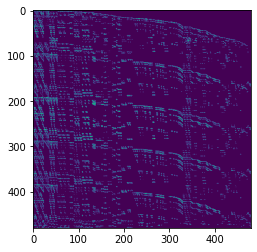

In [318]:
plt.imshow(rbsa)

In [372]:
rbsa0 = loadSPM("recordings/myPart0.mtx")
rbsa1 = loadSPM("recordings/myPart1.mtx")
rbsa2 = loadSPM("recordings/myPart2.mtx")
rbsa3 = loadSPM("recordings/myPart3.mtx")

(10, 240) (10, 240) (10, 480)
0.0
0.0


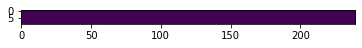

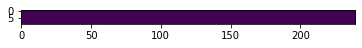

In [551]:
v0 = readDense("recordings/startVec0.mtx")
v1 = readDense("recordings/startVec1.mtx")
v2 = readDense("recordings/startVec2.mtx")
v3 = readDense("recordings/startVec3.mtx")

v = readDense("recordings/startVec.mtx")
print(v0.shape, v1.shape, v.shape)
if (v0.shape == v1.shape):
    if np.linalg.norm(v0-v1) == 0:
        print("error")
else:
    print("v0 & v1 don't have the same shape")
plt.imshow(v[:,:v0.shape[1]] - v0)
print(np.linalg.norm(v[:,:v0.shape[1]] - v0))
plt.figure()
plt.imshow(v[:,v0.shape[1]:] - v1)
print(np.linalg.norm(v[:,v0.shape[1]:] - v1))

In [554]:
v0-v2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [354]:
print(v1)
print(v2)

[[2400 2410 2420 ... 4770 4780 4790]
 [2401 2411 2421 ... 4771 4781 4791]
 [2402 2412 2422 ... 4772 4782 4792]
 ...
 [2407 2417 2427 ... 4777 4787 4797]
 [2408 2418 2428 ... 4778 4788 4798]
 [2409 2419 2429 ... 4779 4789 4799]]
[[   0   10   20 ... 2370 2380 2390]
 [   1   11   21 ... 2371 2381 2391]
 [   2   12   22 ... 2372 2382 2392]
 ...
 [   7   17   27 ... 2377 2387 2397]
 [   8   18   28 ... 2378 2388 2398]
 [   9   19   29 ... 2379 2389 2399]]


In [375]:
res = ((rbsa@v.T)%prime).T
np.max(((mulBlock(rbsa0,v0) + mulBlock(rbsa1,v1) + mulBlock(rbsa2,v2) + mulBlock(rbsa3,v3)) - res)%prime)

0

In [392]:
tmpP0 = readDense("recordings/tmp0it0.mtx")
tmpP1 = readDense("recordings/tmp1it0.mtx")
tmpP2 = readDense("recordings/tmp2it0.mtx")
tmpP3 = readDense("recordings/tmp3it0.mtx")
tmp = readDense("recordings/tmp0.mtx")
tmpMerged0 = readDense("recordings/tmp0it0merged.mtx")
tmpMerged1 = readDense("recordings/tmp3it0merged.mtx")



In [394]:
tmpMerged0.shape

(10, 241)

In [396]:
tmpP0.shape

(10, 241)

In [395]:
tmpMerged1.shape

(10, 240)

In [367]:
tmpP0.shape

(10, 241)

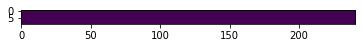

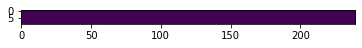

In [373]:
plt.imshow(((rbsa@v.T).T[:,:tmpP0.shape[1]] - tmpP0 -tmpP1)%prime)
plt.figure()
plt.imshow(((rbsa@v.T).T[:,tmpP0.shape[1]:] - tmpP2 -tmpP3)%prime)

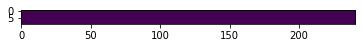

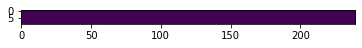

In [404]:
plt.imshow((tmpMerged0 - ((tmpP0 + tmpP1)%prime)))
plt.figure()
plt.imshow((tmpMerged1 - ((tmpP2 + tmpP3)%prime)))

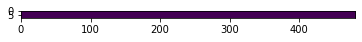

In [379]:
plt.imshow(((rbsa@v.T).T - tmp)%prime)

In [383]:
tmpTop = (tmpP0 + tmpP1) % prime
tmpBot = (tmpP2 + tmpP3) % prime

(10, 241) (10, 241) (10, 481)
0.0
0.0


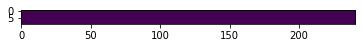

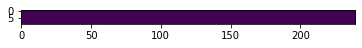

In [387]:
print(tmpP0.shape, tmpP1.shape, tmp.shape)
if (tmpBot.shape == tmpTop.shape):
    print(np.linalg.norm(tmpBot-tmpTop))
plt.imshow((tmp[:,:tmpP0.shape[1]] - tmpTop)%prime)
print(np.linalg.norm((res[:,:tmpTop.shape[1]] - tmpTop) % prime))
plt.figure()
plt.imshow((tmp[:,tmpP0.shape[1]:] - tmpBot)%prime)
print(np.linalg.norm(res[:,tmpTop.shape[1]:] - tmpBot))

v

In [494]:
Av = readDense("recordings/Avit0.mtx")
Av0 = readDense("recordings/Av0it0.mtx")
Av1 = readDense("recordings/Av1it0.mtx")
Av2 = readDense("recordings/Av2it0.mtx")
Av3 = readDense("recordings/Av3it0.mtx")
Av0m = readDense("recordings/Av0it0Merged.mtx")
Av1m = readDense("recordings/Av1it0Merged.mtx")

In [495]:
(rbsa0.T @ tmp.T)%prime

array([[63839, 47657, 31475, ..., 16102, 65457, 49275],
       [64632, 50089, 35546, ..., 28368, 13825, 64819],
       [64382, 45922, 27462, ...,   699, 47776, 29316],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=uint32)

In [513]:
((rbsa1.T+rbsa0.T)@ np.hstack([tmpMerged0,np.zeros_like(tmpMerged1)]).T)%prime

array([[63839, 47657, 31475, ..., 16102, 65457, 49275],
       [64632, 50089, 35546, ..., 28368, 13825, 64819],
       [64382, 45922, 27462, ...,   699, 47776, 29316],
       ...,
       [50321, 38525, 26729, ..., 33286, 21490,  9694],
       [56998, 33406,  9814, ..., 22928, 64873, 41281],
       [ 5001, 14850, 24699, ...,  8407, 18256, 28105]], dtype=uint32)

In [507]:
print(Av1)

[[41411 35250 54751 ... 50321 56998  5001]
 [60620 57157 60006 ... 38525 33406 14850]
 [14292 13527 65261 ... 26729  9814 24699]
 ...
 [44800 57525 25999 ... 33286 22928  8407]
 [64009 13895 31254 ... 21490 64873 18256]
 [17681 35802 36509 ...  9694 41281 28105]]


In [625]:
print((Av0+Av2)%prime - Av0m)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [524]:
Av[:,:240]

array([[58953,  8793, 64018, ..., 43996,  1634, 27797],
       [22451, 37828, 27516, ..., 25732,  5775, 64881],
       [51486,  1326, 56551, ...,  7468,  9916, 36428],
       ...,
       [   50, 15427,  5115, ..., 47222, 30621, 25237],
       [29085, 44462, 34150, ..., 28958, 34762, 62321],
       [58120,  7960, 63185, ..., 10694, 38903, 33868]], dtype=uint32)

In [525]:
Av0m

array([[58953,  8793, 64018, ..., 43996,  1634, 27797],
       [22451, 37828, 27516, ..., 25732,  5775, 64881],
       [51486,  1326, 56551, ...,  7468,  9916, 36428],
       ...,
       [   50, 15427,  5115, ..., 47222, 30621, 25237],
       [29085, 44462, 34150, ..., 28958, 34762, 62321],
       [58120,  7960, 63185, ..., 10694, 38903, 33868]], dtype=uint32)

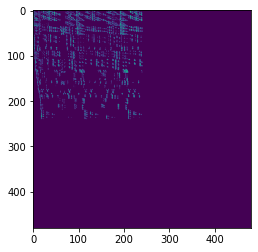

In [449]:
plt.imshow(rbsa0.T)

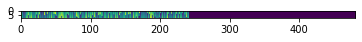

In [450]:
plt.imshow(np.hstack([tmpMerged0,np.zeros_like(tmpMerged1)]))

In [448]:
Av0

array([[ 4499, 18881, 12634, ..., 33455, 56628, 54622],
       [27126, 33142, 28797, ...,  2375, 31933, 11217],
       [49753, 47403, 44960, ..., 36832,  7238, 33349],
       ...,
       [31814, 53171, 60238, ..., 12506, 14837, 12935],
       [54441,  1895, 10864, ..., 46963, 55679, 35067],
       [11531, 16156, 27027, ..., 15883, 30984, 57199]], dtype=uint32)

(10, 240) (10, 240) (10, 480)


0.0

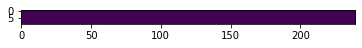

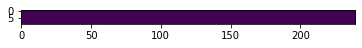

In [526]:
tab = readDense("recordings/Avit0.mtx")
tab0 = readDense("recordings/Av0it0Merged.mtx")
tab1 = readDense("recordings/Av3it0Merged.mtx")
print(tab0.shape, tab1.shape, tab.shape)
plt.imshow(tab[:,:tab0.shape[1]]-tab0)
np.linalg.norm(tab[:,:tab0.shape[1]]-tab0)
plt.imshow(tab[:,:tab0.shape[1]]-tab0)
np.linalg.norm(tab[:,:tab0.shape[1]]-tab0)
plt.figure()
plt.imshow(tab[:,tab0.shape[1]:]-tab1)
np.linalg.norm(tab[:,tab0.shape[1]:]-tab1)


In [547]:
v0end = readDense("recordings/test_parallel_v0it0.mtx")
v1end = readDense("recordings/test_parallel_v1it0.mtx")
v2end = readDense("recordings/test_parallel_v2it0.mtx")
v3end = readDense("recordings/test_parallel_v3it0.mtx")
test_v0 = readDense("recordings/test_v0.mtx")

In [548]:
print(np.linalg.norm(test_v0[:,:240]-v0end))
print(np.linalg.norm(test_v0[:,240:]-v1end))

0.0
0.0


In [576]:
print((v0end-v2end == 0).all(),(v1end-v3end==0).all())

True True


In [621]:
Av10=readDense("recordings/Av0it1.mtx")
Av11=readDense("recordings/Av1it1.mtx")
Av12=readDense("recordings/Av2it1.mtx")
Av13=readDense("recordings/Av3it1.mtx")
AvIt1 = readDense("recordings/Avit1.mtx")

FileNotFoundError: [Errno 2] No such file or directory: 'recordings/Av0it1.mtx'

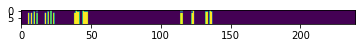

In [575]:
plt.imshow((AvIt1[:,:240]-(Av10+Av12)%prime))

In [630]:
finalSgl = readDense("recordings/single_proc_kernel_TF10.mtx")


In [631]:
final = readDense("recordings/kernel_TF10.mtx").T

0.0

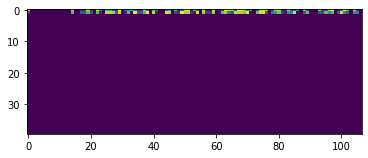

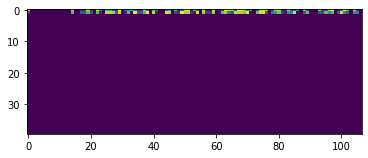

In [632]:
plt.imshow(finalSgl)
plt.figure()
plt.imshow(final)
np.linalg.norm(finalSgl - final)

In [614]:
finalSgl16 = readDense("recordings/single_proc_kernel_TF16.mtx")
final16 = readDense("recordings/kernel_TF16.mtx").T

0.0

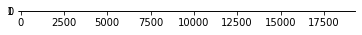

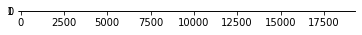

In [615]:
np.linalg.norm(finalSgl16-final16)